In [127]:
import pandas as pd
import numpy as np

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
accuracy_df = pd.DataFrame()
precision_df = pd.DataFrame()
recall_df = pd.DataFrame()
allMetrics = []
misclassified_samples=[]
only_one=0

In [131]:
MAE1_df = pd.DataFrame()
MAE2_df = pd.DataFrame()
allMAE = []

# ***K-NN CLASSIFICATION PART***




 >  # **k-nn classification without feature normalization**



In [132]:
#read classification data with Pandas
df=pd.read_csv("/content/drive/MyDrive/Fall'22/bbm409/ass-1/subset_16P.csv", encoding='cp1252')

In [133]:
display(df)

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,35874,-1,0,-1,1,-1,-2,-2,0,-1,...,0,3,0,0,0,0,1,-1,0,ENTP
1,42624,0,0,1,0,0,0,-1,0,0,...,0,2,0,0,0,0,-1,-3,2,INTP
2,55199,0,0,-2,-1,2,-2,0,0,-1,...,0,0,0,1,0,0,3,0,0,ESTP
3,52983,0,0,0,1,-2,-1,0,0,1,...,1,1,0,-1,0,-1,2,-2,0,ENTP
4,22864,0,0,2,1,0,-2,-1,0,1,...,1,-2,0,1,0,0,0,-2,2,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1898,0,0,1,0,-2,0,0,0,3,...,0,2,0,1,0,0,0,0,2,INFJ
9996,36103,0,-1,-2,-2,-2,1,0,0,-2,...,0,-1,0,-3,0,0,2,0,-3,ESTJ
9997,46766,0,0,2,1,2,-1,0,0,-1,...,-1,-1,0,0,0,0,2,0,1,ENFP
9998,2050,0,0,1,1,0,1,-1,0,1,...,0,-2,0,3,0,0,2,0,1,INFJ


In [134]:
#drop Response Id column because it was not important for train and test
df.drop(columns=["Response Id"],inplace=True)

In [135]:
#Shuffle DataFrame rows
import random
dfx=df.to_numpy()
dfx=sorted(dfx, key = lambda x: random.random())
dfy=pd.DataFrame(dfx)
df = dfy
display(df)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,2,1,-3,0,2,0,1,0,...,0,-2,0,1,1,0,-1,1,1,ISFJ
1,0,-1,2,1,1,2,1,0,1,-1,...,0,0,0,1,0,0,-1,0,-1,ISTP
2,0,0,-1,0,-2,1,-1,0,-1,-1,...,0,-1,0,0,1,0,3,3,-1,ESTJ
3,0,0,-2,0,-2,0,2,0,-2,0,...,0,0,0,0,0,0,1,2,1,ESTJ
4,-1,0,-2,1,0,-1,-2,0,1,0,...,0,-1,0,1,0,0,0,-2,0,ENTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1,0,-1,-1,0,3,0,0,0,0,...,0,0,0,-1,0,0,1,1,-1,ESFP
9996,0,0,1,0,0,1,-1,0,0,0,...,1,-2,0,-1,-1,1,-1,0,2,INFP
9997,0,0,-1,-1,-2,1,-2,0,2,0,...,0,-1,-1,2,0,0,3,-2,-1,INTP
9998,0,-1,3,2,-1,2,-1,0,0,0,...,0,-2,0,1,0,-1,1,-2,-1,INFJ


In [136]:
#get X data
X=df.iloc[:,:-1]

In [137]:
#get y data, its order is important
y=df.iloc[:,-1]

In [138]:
#Numeric expression is good for y variables
def label_encoding(y):
    unique=y.unique()
    labels={}
    count=0
    for i in unique:
        labels[i]=count
        count+=1
    column=y.name
    y_new=y.replace(labels)
    
    return (y_new,labels)

In [139]:
y_new,labels=label_encoding(y)

In [140]:
#you can see corresponding numeric expression for unique y variables
labels

{'ISFJ': 0,
 'ISTP': 1,
 'ESTJ': 2,
 'ENTP': 3,
 'ESTP': 4,
 'ENFJ': 5,
 'ENFP': 6,
 'INFJ': 7,
 'ISTJ': 8,
 'ISFP': 9,
 'INTJ': 10,
 'ENTJ': 11,
 'INFP': 12,
 'ESFJ': 13,
 'ESFP': 14,
 'INTP': 15}

In [142]:
#here is k_nn classification algorithm class
class k_nn_classification:
    #initialize with k
    def __init__(self,k):
        self.k = k
    #fit model is simple because we only kept X_train and y_train in memory
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train

    def classification(self,y_test,y_predict,class_list):
      global only_one
      global misclassified_samples
      size=len(y_predict)
      confusion_matrix={}
      metrices={}
      #create an empty confusion matrix with dictionary
      for i in range(len(class_list)):
          confusion_matrix[i]={"TP":0,"TN":0,"FP":0,"FN":0}
          metrices[i]={"acc":0,"pre":0,"rec":0}
      #fill confusion matrix
      for true,pred in zip(y_test,y_predict):
          if(true==pred):
              #when true==pred it is TP for true class
              confusion_matrix[true]["TP"]+=1
          else:
              #when true!=pred it is FN for true class, FP for pred class 
              confusion_matrix[true]["FN"]+=1
              confusion_matrix[pred]["FP"]+=1
              if(only_one==0):
                misclassified_samples.append([true,pred])
      only_one+=1

      for i in confusion_matrix.keys():
          #the remining predic for each class is TN it means the predict or the true is not equal to i. class
          confusion_matrix[i]["TN"]=size-sum(confusion_matrix[i].values())
      
      
      for k in confusion_matrix.keys():
        #use "try-except" for prevent from zero division. If any of this cause zero division, its variable will be 0.
        try:
          metrices[k]["acc"]=(confusion_matrix[k]["TP"]+confusion_matrix[k]["TN"])/(confusion_matrix[k]["TP"]+confusion_matrix[k]["TN"]+confusion_matrix[k]["FP"]+confusion_matrix[k]["FN"])
        except:
          print("zero division in accuracy")

        try:
          metrices[k]["pre"]=confusion_matrix[k]["TP"]/(confusion_matrix[k]["TP"]+confusion_matrix[k]["FP"])
        except:
          print("zero division in precision")
        
        try:
          metrices[k]["rec"]=confusion_matrix[k]["TP"]/(confusion_matrix[k]["TP"]+confusion_matrix[k]["FN"])
        except:
          print("zero division in recall")

         # this function returns all metrices with average
      return metrices
    
        
    def euclidean_distance(self,X_train,X_test):
            #compute euclidean distance with every training data(all training data) and each test data(only one test data)
            X_train=X_train.to_numpy()
            X_test=np.asarray(X_test)


            #return all distances between all training data and one test data
            return np.sqrt(np.sum(np.square(np.abs(X_train-X_test)),axis=1))
        
    def predict(self,X_test):
        y_predict=[]
        for i in range(X_test.shape[0]):
            #calculate all distances
            distance=self.euclidean_distance(self.X_train,list(X_test.iloc[i,:]))
            #concate them with corresponding y train
            concate=sorted(list(zip(distance,self.y_train)))
            #take first k distances and y trains
            classes=concate[:self.k]

            #count all first k "y_train"
            alls={}
            for i in classes:
                try:
                    alls[i[1]]+=1
                except:
                    alls[i[1]]=1
            #predict y for X test
            y_pred=None
            max_number=0
            for k,v in alls.items():
                if(v>max_number):
                    max_number=v
                    y_pred=k
            y_predict.append(y_pred)
        return y_predict

In [143]:
def cross_val_score_classification(clf, X, y, cv,class_list):
        
        #split n-folds all data
        folds = np.array_split(pd.concat([X, y], axis=1), cv)

        metrics=[]
        for i in range(cv):
            #iterate n times the train-test for each fold
            train = folds.copy()
            test = folds[i]
            del train[i]
            train = pd.concat(train, sort=False)

            X_train=train.iloc[:,:-1]
            y_train=train.iloc[:,-1]
            
            X_test=test.iloc[:,:-1]
            y_test=test.iloc[:,-1]
            
            #fit model to given classification algorithm
            clf.fit(X_train, y_train)
            #predict values
            y_predict=clf.predict(X_test)
            #evaluate predict values
            metrices=clf.classification(y_test,y_predict,class_list)
            #append metrices a list because we will predict n times
            metrics.append(metrices)
        accuracy={}
        precision={}
        recall={}
        count=1
        for i in range(len(class_list)):
          accuracy[i]={}
          precision[i]={}
          recall[i]={}
          for j in range(cv):
              accuracy[i]["FOLD-{}".format(j+1)]=0
              precision[i]["FOLD-{}".format(j+1)]=0
              recall[i]["FOLD-{}".format(j+1)]=0

        for i in metrics:
          for j in range(len(class_list)):
            accuracy[j]["FOLD-{}".format(count)]=i[j]["acc"]
            precision[j]["FOLD-{}".format(count)]=i[j]["pre"]
            recall[j]["FOLD-{}".format(count)]=i[j]["rec"]
          count+=1
          
        return (accuracy,precision,recall)
            
    

In [144]:
from IPython.display import display
def evaluation(metrics,class_names):
    global accuracy_df  
    global precision_df 
    global recall_df

    titles=["Accuracy","Precision","Recall"]
    for i,j in zip(metrics,titles):

      df=pd.DataFrame(i)
      df.columns=class_names
      new_df=pd.DataFrame(df.mean(axis=1)).T

      if(j == "Accuracy"):
        accuracy_df = pd.concat([accuracy_df, new_df.T], axis=1)
      if(j == "Precision"):
        precision_df = pd.concat([precision_df, new_df.T], axis=1)
      if(j == "Recall"):
        recall_df = pd.concat([recall_df, new_df.T], axis=1)


**Here is k=[1,3,5,7,9] k-nn algorithm evaluation:**

In [ ]:
clf1=k_nn_classification(1)
metrics1=cross_val_score_classification(clf1, X, y_new, 5,y.unique())
allMetrics.append(metrics1)

In [ ]:
clf2=k_nn_classification(3)
metrics2=cross_val_score_classification(clf2, X, y_new, 5,y.unique())
allMetrics.append(metrics2)

In [ ]:
clf3=k_nn_classification(5)
metrics3=cross_val_score_classification(clf3, X, y_new, 5,y.unique())
allMetrics.append(metrics3)

In [ ]:
clf4=k_nn_classification(7)
metrics4=cross_val_score_classification(clf4, X, y_new, 5,y.unique())
allMetrics.append(metrics4)

In [ ]:
clf5=k_nn_classification(9)
metrics5=cross_val_score_classification(clf5, X, y_new, 5,y.unique())
allMetrics.append(metrics5)

#> **weighted k-nn without feature normalization**

In [145]:
#here is weighted k_nn classification algorithm class
class weighted_k_nn_classification:
    #initialize with k
    def __init__(self,k):
        self.k = k
    #fit model is simple because we only kept X_train and y_train in memory    
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
        
    def classification(self,y_test,y_predict,class_list):
      global only_one
      global misclassified_samples

      size=len(y_predict)
      confusion_matrix={}
      metrices={}
      #create an empty confusion matrix with dictionary
      for i in range(len(class_list)):
          confusion_matrix[i]={"TP":0,"TN":0,"FP":0,"FN":0}
          metrices[i]={"acc":0,"pre":0,"rec":0}
      #fill confusion matrix
      for true,pred in zip(y_test,y_predict):
          if(true==pred):
              #when true==pred it is TP for true class
              confusion_matrix[true]["TP"]+=1
          else:
              #when true!=pred it is FN for true class, FP for pred class
              confusion_matrix[true]["FN"]+=1
              confusion_matrix[pred]["FP"]+=1
              if(only_one==0):
                misclassified_samples.append([true,pred])
      only_one+=1

      for k in confusion_matrix.keys():
          #the remining predict for each class is TN it means the predict or the true is not equal to i. class
          
          confusion_matrix[k]["TN"]=size-sum(confusion_matrix[k].values())
      
      
      for k in confusion_matrix.keys():
        #use "try-except" for prevent from zero division. If any of this cause zero division, its variable will be 0.
        try:
          metrices[k]["acc"]=(confusion_matrix[k]["TP"]+confusion_matrix[k]["TN"])/(confusion_matrix[k]["TP"]+confusion_matrix[k]["TN"]+confusion_matrix[k]["FP"]+confusion_matrix[k]["FN"])
        except:
          print("zero division in accuracy")

        try:
          metrices[k]["pre"]=confusion_matrix[k]["TP"]/(confusion_matrix[k]["TP"]+confusion_matrix[k]["FP"])
        except:
          print("zero division in precision")
        
        try:
          metrices[k]["rec"]=confusion_matrix[k]["TP"]/(confusion_matrix[k]["TP"]+confusion_matrix[k]["FN"])
        except:
          print("zero division in recall")
      # this function returns all metrices
      return metrices

    def euclidean_distance(self,X_train,X_test):
            #compute euclidean distance with every training data(all training data) and each test data(only one test data)
            X_train=X_train.to_numpy()
            X_test=np.asarray(X_test)
            #return all distances between all training data and one test data
            return np.sqrt(np.sum(np.square(np.abs(X_train-X_test)),axis=1))

    def predict(self,X_test):
        y_predict=[]
        for i in range(X_test.shape[0]):
            #calculate all distances
            distance=self.euclidean_distance(self.X_train,list(X_test.iloc[i,:]))
            # inversely proportion gives weighted distance
            distance=1/distance
            #concate them with corresponding y train
            concate=sorted(list(zip(distance,self.y_train)),reverse=True)
            #take first k distances and y trains
            classes=concate[:self.k]
            #calculate sum of weighted
            alls={}
            for i in classes:
                try:
                    alls[i[1]]+=i[0]
                except:
                    alls[i[1]]=i[0]
            #predict y for X test
            y_pred=None
            max_number=0
            for k,v in alls.items():
                if(v>max_number):
                    max_number=v
                    y_pred=k
            y_predict.append(y_pred)

        return y_predict

In [ ]:
clf_w1=weighted_k_nn_classification(1)
metric=cross_val_score_classification(clf_w1, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w2=weighted_k_nn_classification(3)
metric=cross_val_score_classification(clf_w2, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w3=weighted_k_nn_classification(5)
metric=cross_val_score_classification(clf_w3, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w4=weighted_k_nn_classification(7)
metric=cross_val_score_classification(clf_w4, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w5=weighted_k_nn_classification(9)
metric=cross_val_score_classification(clf_w5, X, y_new, 5,y.unique())
allMetrics.append(metric)

 >  # **k-nn classification with feature normalization**

In [ ]:
def min_max_normalization(df):

    df= (df-df.min())/(df.max()-df.min())
    
    return df
    

In [ ]:
X_norm=min_max_normalization(X)
X_norm

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.5,0.5,0.500000,0.833333,0.333333,0.000000,0.000000,0.5,0.500000,0.5,...,0.5,0.5,0.500000,1.0,0.666667,0.5,0.5,0.333333,0.833333,0.333333
1,0.5,0.5,0.333333,0.000000,0.166667,0.500000,0.333333,0.5,0.666667,0.5,...,0.5,0.5,0.333333,0.5,0.666667,0.5,0.5,0.166667,0.666667,0.666667
2,0.5,0.5,0.833333,0.333333,0.500000,0.500000,0.166667,0.5,0.666667,0.5,...,0.0,0.5,0.333333,0.5,0.666667,0.5,0.5,0.500000,0.666667,0.333333
3,0.5,0.5,0.500000,0.500000,0.666667,0.500000,0.333333,1.0,0.500000,0.5,...,0.5,0.5,0.333333,0.5,0.333333,1.0,0.5,0.833333,0.833333,0.333333
4,0.5,0.5,0.833333,0.666667,0.833333,0.833333,0.833333,0.5,0.166667,0.5,...,0.5,0.5,0.666667,0.5,0.166667,0.5,0.5,0.666667,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.5,0.5,0.666667,0.833333,0.333333,0.333333,0.500000,0.0,0.333333,0.5,...,0.5,0.5,0.666667,0.5,0.666667,0.5,0.5,0.500000,0.500000,0.833333
9996,0.5,0.5,0.333333,0.333333,0.833333,0.000000,0.500000,0.5,0.000000,0.5,...,0.5,0.5,0.333333,0.5,0.500000,0.5,0.5,0.833333,0.666667,1.000000
9997,0.5,0.5,0.833333,0.500000,0.500000,0.500000,0.500000,1.0,0.333333,0.5,...,0.5,0.5,0.833333,0.5,1.000000,0.5,0.5,0.500000,0.166667,1.000000
9998,0.5,0.5,0.833333,0.666667,0.500000,0.333333,0.333333,0.5,0.833333,0.5,...,1.0,0.5,0.666667,0.0,1.000000,1.0,0.5,1.000000,0.333333,0.833333


In [ ]:
clf1_norm=k_nn_classification(1)
metric=cross_val_score_classification(clf1_norm, X_norm, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf2_norm=k_nn_classification(3)
metric=cross_val_score_classification(clf2_norm, X_norm, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf3_norm=k_nn_classification(5)
metric=cross_val_score_classification(clf3_norm, X_norm, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf4_norm=k_nn_classification(7)
metric=cross_val_score_classification(clf4_norm, X_norm, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf5_norm=k_nn_classification(9)
metric=cross_val_score_classification(clf5_norm, X_norm, y_new, 5,y.unique())
allMetrics.append(metric)

#> **weighted k-nn with feature normalization**

In [ ]:
clf_w1_norm=weighted_k_nn_classification(1)
metric=cross_val_score_classification(clf_w1_norm, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w2_norm=weighted_k_nn_classification(3)
metric=cross_val_score_classification(clf_w2_norm, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w3_norm=weighted_k_nn_classification(5)
metric=cross_val_score_classification(clf_w3_norm, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w4_norm=weighted_k_nn_classification(7)
metric=cross_val_score_classification(clf_w4_norm, X, y_new, 5,y.unique())
allMetrics.append(metric)

In [ ]:
clf_w5_norm=weighted_k_nn_classification(9)
metric=cross_val_score_classification(clf_w5_norm, X, y_new, 5,y.unique())
allMetrics.append(metric)

# ERROR ANAYLSIS FOR CLASSIFICATION

**-Missed classification analysis**

We wanted to deal with the misclassifications of 4 different situations. These are k-nn k=3,k=5 and weighted k-nn k=3, k=5. We have 33 misclassifieds for k-nn k=3. Of these, 15 is the most misclassified. Probably their X values ​​are located far from their class.  These can vary according to the values ​​of k and the distance of X to its own class. When k=5, these errors are reduced.

When we look at Weighted k-nn k=3, the errors have increased. This may be related to the misclassified value being close to other classes at k=3. And this is also related to the decrease and increase of k. It is seen that less error is taken at k=5.

Also, since our test size is 2 thousand, these errors are not very troublesome. Because it is possible in real life problems that some X values ​​may remain outlier.

In [146]:
only_one=0
misclassified_samples=[]
clf_error=k_nn_classification(3)
cross_val_score_classification(clf_error, X, y_new, 5,y.unique())
count_misses={}
for i in misclassified_samples:
  print("True Value:",i[0],"Predict Value:",i[1])
  try:
    count_misses[i[0]]+=1
  except:
    count_misses[i[0]]=1
print("Misses counts:")
print(count_misses)
print("Total misses:",sum(count_misses.values()))

True Value: 15 Predict Value: 10
True Value: 12 Predict Value: 2
True Value: 5 Predict Value: 8
True Value: 13 Predict Value: 4
True Value: 2 Predict Value: 13
True Value: 7 Predict Value: 4
True Value: 6 Predict Value: 5
True Value: 6 Predict Value: 3
True Value: 13 Predict Value: 1
True Value: 4 Predict Value: 12
True Value: 10 Predict Value: 1
True Value: 15 Predict Value: 8
True Value: 10 Predict Value: 13
True Value: 10 Predict Value: 9
True Value: 9 Predict Value: 6
True Value: 10 Predict Value: 5
True Value: 8 Predict Value: 3
True Value: 4 Predict Value: 11
True Value: 2 Predict Value: 6
True Value: 1 Predict Value: 15
True Value: 15 Predict Value: 5
True Value: 15 Predict Value: 12
True Value: 0 Predict Value: 9
True Value: 14 Predict Value: 2
True Value: 13 Predict Value: 15
True Value: 10 Predict Value: 12
True Value: 1 Predict Value: 5
True Value: 13 Predict Value: 10
True Value: 13 Predict Value: 8
True Value: 5 Predict Value: 4
True Value: 15 Predict Value: 8
True Value: 

In [147]:
only_one=0
misclassified_samples=[]
clf_error2=k_nn_classification(5)
metric=cross_val_score_classification(clf_error2, X, y_new, 5,y.unique())
count_misses={}
for i in misclassified_samples:
  print("True Value:",i[0],"Predict Value:",i[1])
  try:
    count_misses[i[0]]+=1
  except:
    count_misses[i[0]]=1
print("Misses counts:")
print(count_misses)
print("Total misses:",sum(count_misses.values()))

True Value: 15 Predict Value: 10
True Value: 12 Predict Value: 2
True Value: 13 Predict Value: 4
True Value: 2 Predict Value: 13
True Value: 6 Predict Value: 5
True Value: 6 Predict Value: 3
True Value: 4 Predict Value: 12
True Value: 10 Predict Value: 1
True Value: 10 Predict Value: 9
True Value: 9 Predict Value: 6
True Value: 7 Predict Value: 8
True Value: 10 Predict Value: 5
True Value: 8 Predict Value: 3
True Value: 4 Predict Value: 11
True Value: 2 Predict Value: 6
True Value: 15 Predict Value: 5
True Value: 0 Predict Value: 9
True Value: 14 Predict Value: 2
True Value: 13 Predict Value: 15
True Value: 10 Predict Value: 12
True Value: 1 Predict Value: 5
True Value: 13 Predict Value: 10
True Value: 5 Predict Value: 4
True Value: 15 Predict Value: 4
True Value: 6 Predict Value: 5
Misses counts:
{15: 3, 12: 1, 13: 3, 2: 2, 6: 3, 4: 2, 10: 4, 9: 1, 7: 1, 8: 1, 0: 1, 14: 1, 1: 1, 5: 1}
Total misses: 25


In [148]:
only_one=0
misclassified_samples=[]
clf_error3=weighted_k_nn_classification(3)
metric=cross_val_score_classification(clf_error3, X, y_new, 5,y.unique())
count_misses={}
for i in misclassified_samples:
  print("True Value:",i[0],"Predict Value:",i[1])
  try:
    count_misses[i[0]]+=1
  except:
    count_misses[i[0]]=1
print("Misses counts:")
print(count_misses)
print("Total misses:",sum(count_misses.values()))

True Value: 15 Predict Value: 10
True Value: 12 Predict Value: 2
True Value: 5 Predict Value: 8
True Value: 13 Predict Value: 4
True Value: 2 Predict Value: 13
True Value: 7 Predict Value: 4
True Value: 6 Predict Value: 5
True Value: 6 Predict Value: 3
True Value: 4 Predict Value: 12
True Value: 10 Predict Value: 1
True Value: 15 Predict Value: 8
True Value: 10 Predict Value: 13
True Value: 10 Predict Value: 9
True Value: 9 Predict Value: 6
True Value: 10 Predict Value: 5
True Value: 8 Predict Value: 3
True Value: 4 Predict Value: 11
True Value: 2 Predict Value: 6
True Value: 1 Predict Value: 15
True Value: 15 Predict Value: 5
True Value: 0 Predict Value: 9
True Value: 14 Predict Value: 2
True Value: 13 Predict Value: 15
True Value: 10 Predict Value: 12
True Value: 1 Predict Value: 5
True Value: 13 Predict Value: 14
True Value: 5 Predict Value: 4
True Value: 15 Predict Value: 8
True Value: 15 Predict Value: 4
True Value: 6 Predict Value: 5
Misses counts:
{15: 5, 12: 1, 5: 2, 13: 3, 2: 

In [149]:
only_one=0
misclassified_samples=[]
clf_error4=weighted_k_nn_classification(5)
metric=cross_val_score_classification(clf_error4, X, y_new, 5,y.unique())
count_misses={}
for i in misclassified_samples:
  print("True Value:",i[0],"Predict Value:",i[1])
  try:
    count_misses[i[0]]+=1
  except:
    count_misses[i[0]]=1
print("Misses counts:")
print(count_misses)
print("Total misses:",sum(count_misses.values()))

True Value: 15 Predict Value: 10
True Value: 0 Predict Value: 10
True Value: 12 Predict Value: 2
True Value: 7 Predict Value: 9
True Value: 13 Predict Value: 4
True Value: 2 Predict Value: 13
True Value: 6 Predict Value: 5
True Value: 6 Predict Value: 3
True Value: 4 Predict Value: 12
True Value: 4 Predict Value: 12
True Value: 10 Predict Value: 1
True Value: 10 Predict Value: 9
True Value: 9 Predict Value: 6
True Value: 7 Predict Value: 8
True Value: 10 Predict Value: 5
True Value: 8 Predict Value: 3
True Value: 4 Predict Value: 11
True Value: 2 Predict Value: 6
True Value: 15 Predict Value: 5
True Value: 0 Predict Value: 9
True Value: 14 Predict Value: 2
True Value: 13 Predict Value: 15
True Value: 10 Predict Value: 12
True Value: 1 Predict Value: 5
True Value: 13 Predict Value: 10
True Value: 6 Predict Value: 9
True Value: 5 Predict Value: 4
True Value: 15 Predict Value: 4
True Value: 6 Predict Value: 5
Misses counts:
{15: 3, 0: 2, 12: 1, 7: 2, 13: 3, 2: 2, 6: 4, 4: 3, 10: 4, 9: 1, 

**-Classification Metrics**

In [ ]:
for i in allMetrics:
  evaluation(i,y.unique())


In [ ]:
column = ["knn-1", "knn-3","knn-5","knn-7","knn-9","W-knn-1","W-knn-3","W-knn-5","W-knn-7","W-knn-9","FN-knn-1","FN-knn-3","FN-knn-5","FN-knn-7","FN-knn-9","FN-W-knn-1","FN-W-knn-3","FN-W-knn-5","FN-W-knn-7","FN-W-knn-9"]

accuracy_df.columns = column
precision_df.columns = column
recall_df.columns = column

avgAcc = pd.DataFrame(accuracy_df.mean(axis=0)).T
avgAcc.rename(index={0: "Average Accuracy"}, inplace = True)
avgPre = pd.DataFrame(precision_df.mean(axis=0)).T
avgPre.rename(index={0: "Average Precision"}, inplace = True)
avgRec = pd.DataFrame(recall_df.mean(axis=0)).T
avgRec.rename(index={0: "Average Recall"}, inplace = True)
print("ACCURACY TABLE")
display(accuracy_df)
display(avgAcc)
print()
print("PRECISION TABLE")
display(precision_df)
display(avgPre)
print()
print("RECALL TABLE")
display(recall_df)
display(avgRec)
print()

ACCURACY TABLE


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
FOLD-1,0.996437,0.997687,0.998063,0.998125,0.998063,0.996312,0.997812,0.998062,0.998125,0.998125,0.994812,0.997000,0.997375,0.997375,0.997688,0.996312,0.997812,0.998062,0.998125,0.998125
FOLD-2,0.997250,0.998812,0.998750,0.998812,0.998937,0.997438,0.998875,0.998750,0.998812,0.998937,0.995875,0.998062,0.998375,0.998500,0.998563,0.997438,0.998875,0.998750,0.998812,0.998937
FOLD-3,0.996750,0.998000,0.998250,0.998562,0.998437,0.996500,0.998062,0.998250,0.998437,0.998313,0.995687,0.997500,0.997812,0.998000,0.997938,0.996500,0.998062,0.998250,0.998437,0.998313
FOLD-4,0.996812,0.998313,0.998688,0.998750,0.998812,0.996750,0.998375,0.998688,0.998750,0.998812,0.995375,0.998063,0.998375,0.998500,0.998563,0.996750,0.998375,0.998688,0.998750,0.998812
FOLD-5,0.997312,0.998250,0.998125,0.998375,0.998375,0.997000,0.998250,0.998188,0.998312,0.998438,0.994938,0.997125,0.997875,0.997938,0.998125,0.997000,0.998250,0.998188,0.998312,0.998438


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
Average Accuracy,0.996912,0.998212,0.998375,0.998525,0.998525,0.9968,0.998275,0.998387,0.998488,0.998525,0.995337,0.99755,0.997963,0.998062,0.998175,0.9968,0.998275,0.998387,0.998488,0.998525



PRECISION TABLE


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
FOLD-1,0.971519,0.981747,0.984634,0.985110,0.984582,0.970553,0.982731,0.984647,0.985146,0.985111,0.958971,0.976347,0.979296,0.979201,0.981581,0.970553,0.982731,0.984647,0.985146,0.985111
FOLD-2,0.978562,0.990720,0.990200,0.990743,0.991755,0.979815,0.991190,0.990200,0.990743,0.991755,0.967510,0.984577,0.987041,0.988252,0.988627,0.979815,0.991190,0.990200,0.990743,0.991755
FOLD-3,0.974437,0.984242,0.986201,0.988881,0.987813,0.972489,0.984771,0.986210,0.987909,0.986749,0.966444,0.980098,0.982698,0.984234,0.983709,0.972489,0.984771,0.986210,0.987909,0.986749
FOLD-4,0.975014,0.986717,0.989765,0.990241,0.990678,0.974603,0.987407,0.989765,0.990191,0.990678,0.963624,0.984982,0.987384,0.988343,0.988868,0.974603,0.987407,0.989765,0.990191,0.990678
FOLD-5,0.978483,0.985859,0.984792,0.986803,0.986890,0.975855,0.985920,0.985251,0.986312,0.987351,0.959559,0.976666,0.982701,0.983171,0.984733,0.975855,0.985920,0.985251,0.986312,0.987351


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
Average Precision,0.975603,0.985857,0.987118,0.988355,0.988344,0.974663,0.986404,0.987215,0.98806,0.988329,0.963222,0.980534,0.983824,0.98464,0.985504,0.974663,0.986404,0.987215,0.98806,0.988329



RECALL TABLE


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
FOLD-1,0.971445,0.981634,0.984532,0.985112,0.984600,0.970287,0.982577,0.984524,0.985096,0.985096,0.958068,0.975810,0.979076,0.979006,0.981478,0.970287,0.982577,0.984524,0.985096,0.985096
FOLD-2,0.978020,0.990664,0.990140,0.990594,0.991597,0.979572,0.991124,0.990140,0.990594,0.991597,0.967692,0.985160,0.987465,0.988268,0.988831,0.979572,0.991124,0.990140,0.990594,0.991597
FOLD-3,0.974555,0.984388,0.986384,0.988829,0.987878,0.972643,0.984872,0.986434,0.987786,0.986762,0.965736,0.980194,0.982687,0.984252,0.983668,0.972643,0.984872,0.986434,0.987786,0.986762
FOLD-4,0.974606,0.986411,0.989354,0.989999,0.990478,0.974129,0.986899,0.989354,0.990008,0.990478,0.963412,0.984387,0.986852,0.987839,0.988324,0.974129,0.986899,0.989354,0.990008,0.990478
FOLD-5,0.978382,0.985931,0.984954,0.987042,0.986938,0.975714,0.985856,0.985407,0.986507,0.987491,0.959663,0.976745,0.982720,0.983409,0.984902,0.975714,0.985856,0.985407,0.986507,0.987491


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
Average Recall,0.975402,0.985806,0.987073,0.988315,0.988298,0.974469,0.986266,0.987172,0.987998,0.988285,0.962914,0.980459,0.98376,0.984555,0.98544,0.974469,0.986266,0.987172,0.987998,0.988285


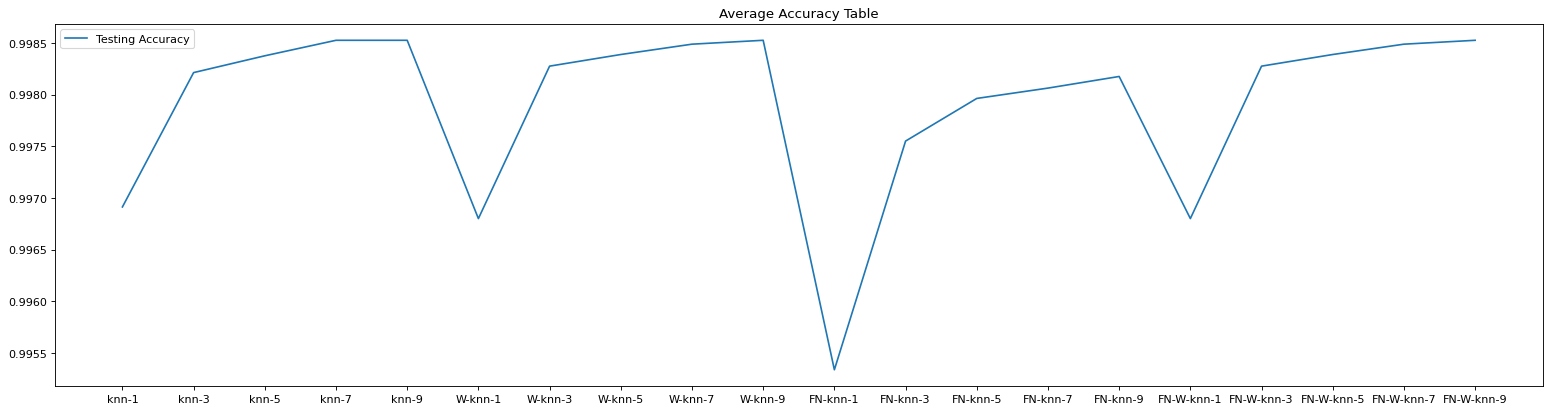

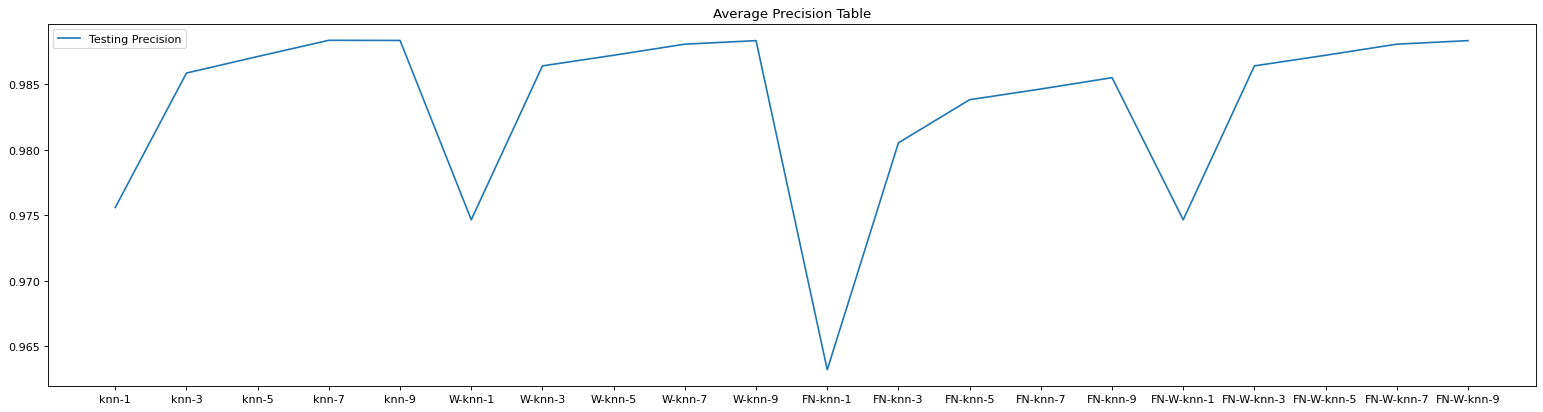

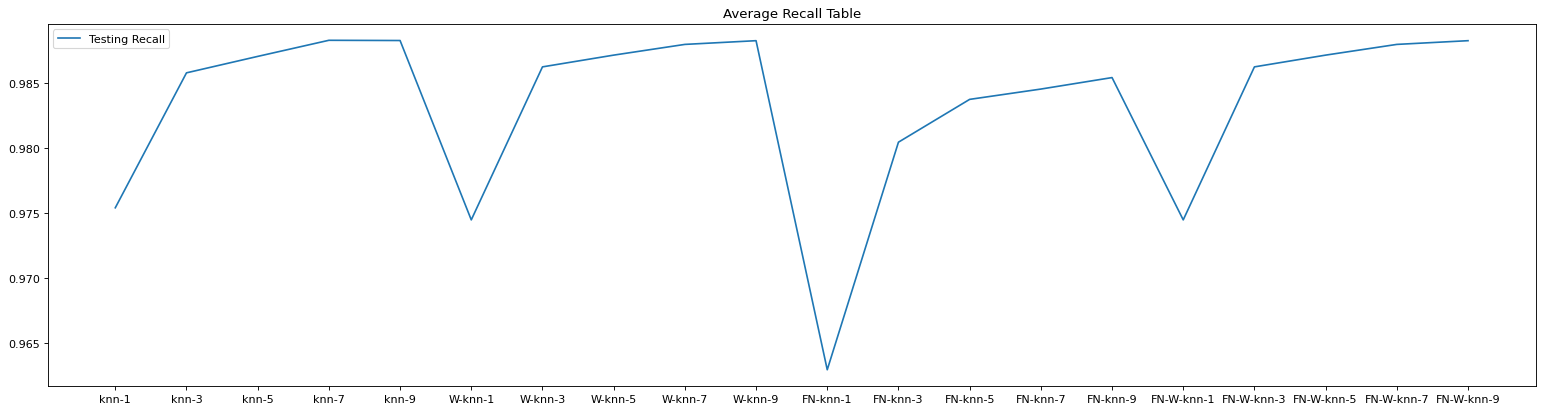

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(24, 6), dpi=80)

plt.title('Average Accuracy Table')
plt.plot(column, avgAcc.loc['Average Accuracy'], label = 'Testing Accuracy')
plt.legend()
plt.show()
figure(figsize=(24, 6), dpi=80)
plt.title('Average Precision Table')
plt.plot(column, avgPre.loc['Average Precision'], label = 'Testing Precision')
plt.legend()
plt.show()
figure(figsize=(24, 6), dpi=80)
plt.title('Average Recall Table')
plt.plot(column, avgRec.loc['Average Recall'], label = 'Testing Recall')
plt.legend()
plt.show()

According to Classification Performance Metrics, all algorithms work with a success rate of over 99%. Due to the sensitivity of the results, there may be unreasonable deviations in the graph. 

Computation time complexity of the algorithm is:

***O(Fold size * test size * (train size * Log(train size)))***

The total computation time of 20 algorithms is 30 minutes.




>**The effect of k:** 
As the number k increases, the probability of error decreases. However, as the k number increases, overfitting may occur. The number k is the number of neighbors to be included in the calculation. The number of neighbors included in the calculation should be chosen optimally. The elbow points on the Accuracy graph are the optimum k values.



> **The effect of the number of training samples used:** 
If the number of samples were increased, the measurement time would increase, but the error rate would decrease. We use all data as train data using cross validation.



> **The effect of using weighted k-NN:**
The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight to the points which are farther away. The simple function which is used is the inverse distance function. Thus, more accurate data were obtained. However, since our results have an accuracy of over 99%, its effect cannot be observed.



> **The effect of min-max normalization:**
There is less misclassification when classification is made on the normalized data. Because normalization helps reduce misclassification by scaling the data when unrelated product data are collected in the same table. It is prevented that the results are affected by too large and too small attributes. The effect of normalization is not great because the attributes are close values in the sample data.






# ***K-NN REGRESSION PART***

 >  # **k-nn regression without feature normalization**

In [125]:
df2=pd.read_csv("/content/drive/MyDrive/Fall'22/bbm409/ass-1/energy_efficiency_data.csv")

In [92]:
df2.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [93]:
#Shuffle DataFrame rows
import random
dfx=df2.to_numpy()
dfx=sorted(dfx, key = lambda x: random.random())
dfy=pd.DataFrame(dfx)
df2 = dfy
display(df2)

,0,1,2,3,4,5,6,7,8,9
0,0.90,563.5,318.5,122.50,7.0,3.0,0.25,5.0,32.31,32.00
1,0.76,661.5,416.5,122.50,7.0,3.0,0.00,0.0,23.93,29.68
2,0.69,735.0,294.0,220.50,3.5,5.0,0.40,2.0,14.62,17.22
3,0.82,612.5,318.5,147.00,7.0,5.0,0.25,4.0,26.00,27.34
4,0.79,637.0,343.0,147.00,7.0,4.0,0.40,4.0,41.32,46.23
...,...,...,...,...,...,...,...,...,...,...
763,0.69,735.0,294.0,220.50,3.5,2.0,0.40,3.0,14.32,16.35
764,0.69,735.0,294.0,220.50,3.5,5.0,0.10,4.0,11.20,14.73
765,0.76,661.5,416.5,122.50,7.0,4.0,0.10,4.0,33.09,33.89
766,0.98,514.5,294.0,110.25,7.0,4.0,0.10,1.0,24.63,26.44


In [94]:
X=df2.iloc[:,:-2]

In [95]:
y=df2.iloc[:,-2:]

In [97]:
#here is k_nn regression algorithm class
class k_nn_regression:
    #initialize with k
    def __init__(self,k):
        self.k = k
     #fit model is simple because we only kept X_train and y_train in memory
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    #calculate Mean Absolute Error
    def MAE(self,y_test,y_pred):
      y_test=y_test.to_numpy()
      y_pred=np.asarray(y_pred)

      return np.sum(np.abs(y_test-y_pred),axis=0)/len(y_test)
    
        
    def euclidean_distance(self,X_train,X_test):
      #compute euclidean distance with every training data(all training data) and each test data(only one test data)
            X_train=X_train.to_numpy()
            X_test=np.asarray(X_test)
            #return all distances between all training data and one test data
            return np.sqrt(np.sum(np.square(np.abs(X_train-X_test)),axis=1))
        
    def predict(self,X_test):
        y_predict=[]
        for i in range(X_test.shape[0]):
            #calculate all distances
            distance=self.euclidean_distance(self.X_train,list(X_test.iloc[i,:]))
            #concate them with corresponding y train
            train_y=self.y_train.to_numpy()
            concate=np.concatenate((distance[:, None],train_y), axis=1)
            concate=sorted(concate.tolist())
            #take first k distances and y trains
            classes=concate[:self.k]
            y_pred=[0,0]
            #Predict with average of k values
            for i in classes:
                y_pred[0]+=i[1]
                y_pred[1]+=i[2]
            y_pred[0]/=self.k
            y_pred[1]/=self.k
            y_predict.append(y_pred)
        return y_predict

In [98]:
def cross_val_score_regression(reg, X, y, cv):
        #split n-folds all data
        folds = np.array_split(pd.concat([X, y], axis=1), cv)

        metrics=[]
        for i in range(cv):
            #iterate n times the train-test for each fold
            train = folds.copy()
            test = folds[i]
            del train[i]
            train = pd.concat(train, sort=False)

            X_train=train.iloc[:,:-2]
            y_train=train.iloc[:,-2:]
            
            X_test=test.iloc[:,:-2]
            y_test=test.iloc[:,-2:]
            #fit model to given regression algorithm
            reg.fit(X_train, y_train)
            #predict values
            y_predict=reg.predict(X_test)
            #evaluate predict values
            metrices=reg.MAE(y_test,y_predict)
            #append metrices a list because we will predict n times
            metrics.append(metrices)
        
        all_MAE={}
        for i in range(cv):
          all_MAE["FOLD-{}".format(i+1)]={}
          all_MAE["FOLD-{}".format(i+1)]["MAE"]=metrics[i]

        return all_MAE
            

In [99]:
reg1=k_nn_regression(1)
metrics=cross_val_score_regression(reg1, X, y, 5)
allMAE.append(metrics)

In [100]:
reg2=k_nn_regression(3)
metrics=cross_val_score_regression(reg2, X, y, 5)
allMAE.append(metrics)

In [101]:
reg3=k_nn_regression(5)
metrics=cross_val_score_regression(reg3, X, y, 5)
allMAE.append(metrics)

In [102]:
reg4=k_nn_regression(7)
metrics=cross_val_score_regression(reg4, X, y, 5)
allMAE.append(metrics)

In [103]:
reg5=k_nn_regression(9)
metrics=cross_val_score_regression(reg5, X, y, 5)
allMAE.append(metrics)

# **weighted k-nn regression without feature normalization**

In [104]:
#here is weighted k_nn regression algorithm class
class weighted_k_nn_regression:
  #initialize with k
    def __init__(self,k):
        self.k = k
     #fit model is simple because we only kept X_train and y_train in memory    
    def fit(self,X_train,y_train):
        self.X_train=X_train
        self.y_train=y_train
    #calculate Mean Absolute Error
    def MAE(self,y_test,y_pred):
      y_test=y_test.to_numpy()
      y_pred=np.asarray(y_pred)

      return np.sum(np.abs(y_test-y_pred),axis=0)/len(y_test)
    
    
    def euclidean_distance(self,X_train,X_test):
            #compute euclidean distance with every training data(all training data) and each test data(only one test data)
            X_train=X_train.to_numpy()
            X_test=np.asarray(X_test)
            #return all distances between all training data and one test data
            return np.sqrt(np.sum(np.square(np.abs(X_train-X_test)),axis=1))
        
    def predict(self,X_test):
        y_predict=[]
        for i in range(X_test.shape[0]):
             #calculate all distances
            distance=self.euclidean_distance(self.X_train,list(X_test.iloc[i,:]))
            # inversely proportion gives weighted distance
            distance=1/distance
            #concate them with corresponding y train
            train_y=self.y_train.to_numpy()
            concate=np.concatenate((distance[:, None],train_y), axis=1)
            concate=sorted(concate.tolist(),reverse=True)
            #take first k distances and y trains
            classes=concate[:self.k]
            y_pred=[0,0]
            weighted_total=0
            #Predict with average of weighted*k values
            for i in classes:
                y_pred[0]+=(i[1]*i[0])
                y_pred[1]+=(i[2]*i[0])
                weighted_total+=i[0]
            y_pred[0]/=weighted_total
            y_pred[1]/=weighted_total
            y_predict.append(y_pred)
        return y_predict

In [105]:
reg_w1=weighted_k_nn_regression(1)
metrics=cross_val_score_regression(reg_w1, X, y, 5)
allMAE.append(metrics)

In [106]:
reg_w2=weighted_k_nn_regression(3)
metrics=cross_val_score_regression(reg_w2, X, y, 5)
allMAE.append(metrics)

In [107]:
reg_w3=weighted_k_nn_regression(5)
metrics=cross_val_score_regression(reg_w3, X, y, 5)
allMAE.append(metrics)

In [108]:
reg_w4=weighted_k_nn_regression(7)
metrics=cross_val_score_regression(reg_w4, X, y, 5)
allMAE.append(metrics)

In [109]:
reg_w5=weighted_k_nn_regression(9)
metrics=cross_val_score_regression(reg_w5, X, y, 5)
allMAE.append(metrics)

# **k-nn regression with feature normalization**




In [110]:
def min_max_normalization(df):

    df= (df-df.min())/(df.max()-df.min())
    
    return df
    

In [126]:
X_norm=min_max_normalization(X)
display(X_norm)

,0,1,2,3,4,5,6,7
0,0.777778,0.166667,0.428571,0.111111,1.0,0.333333,0.625,1.0
1,0.388889,0.500000,1.000000,0.111111,1.0,0.333333,0.000,0.0
2,0.194444,0.750000,0.285714,1.000000,0.0,1.000000,1.000,0.4
3,0.555556,0.333333,0.428571,0.333333,1.0,1.000000,0.625,0.8
4,0.472222,0.416667,0.571429,0.333333,1.0,0.666667,1.000,0.8
...,...,...,...,...,...,...,...,...
763,0.194444,0.750000,0.285714,1.000000,0.0,0.000000,1.000,0.6
764,0.194444,0.750000,0.285714,1.000000,0.0,1.000000,0.250,0.8
765,0.388889,0.500000,1.000000,0.111111,1.0,0.666667,0.250,0.8
766,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.250,0.2


In [112]:
reg_norm1=k_nn_regression(1)
metrics=cross_val_score_regression(reg_norm1, X_norm, y, 5)
allMAE.append(metrics)

In [113]:
reg_norm2=k_nn_regression(3)
metrics=cross_val_score_regression(reg_norm2, X_norm, y, 5)
allMAE.append(metrics)

In [114]:
reg_norm3=k_nn_regression(5)
metrics=cross_val_score_regression(reg_norm3, X_norm, y, 5)
allMAE.append(metrics)

In [115]:
reg_norm4=k_nn_regression(7)
metrics=cross_val_score_regression(reg_norm4, X_norm, y, 5)
allMAE.append(metrics)

In [116]:
reg_norm5=k_nn_regression(9)
metrics=cross_val_score_regression(reg_norm5, X_norm, y, 5)
allMAE.append(metrics)

# **weighted k-nn regression with feature normalization**

In [117]:
reg_norm_w1=weighted_k_nn_regression(1)
metrics=cross_val_score_regression(reg_norm_w1, X_norm, y, 5)
allMAE.append(metrics)

In [118]:
reg_norm_w2=weighted_k_nn_regression(3)
metrics=cross_val_score_regression(reg_norm_w2, X_norm, y, 5)
allMAE.append(metrics)

In [119]:
reg_norm_w3=weighted_k_nn_regression(5)
metrics=cross_val_score_regression(reg_norm_w3, X_norm, y, 5)
allMAE.append(metrics)

In [120]:
reg_norm_w4=weighted_k_nn_regression(7)
metrics=cross_val_score_regression(reg_norm_w4, X_norm, y, 5)
allMAE.append(metrics)

In [121]:
reg_norm_w5=weighted_k_nn_regression(9)
metrics=cross_val_score_regression(reg_norm_w5, X_norm, y, 5)
allMAE.append(metrics)

# ERROR ANALYSIS FOR REGRESSION

In [122]:
column = ["knn-1", "knn-3","knn-5","knn-7","knn-9","W-knn-1","W-knn-3","W-knn-5","W-knn-7","W-knn-9","FN-knn-1","FN-knn-3","FN-knn-5","FN-knn-7","FN-knn-9","FN-W-knn-1","FN-W-knn-3","FN-W-knn-5","FN-W-knn-7","FN-W-knn-9"]

for metrics in allMAE:
  dfm = pd.DataFrame(metrics)
  dfm = pd.DataFrame(dfm.T['MAE'].to_list(), columns=['MAE1','MAE2'])

  MAE1_df = pd.concat([MAE1_df, dfm.loc[:, ['MAE1']]], axis=1)
  MAE2_df = pd.concat([MAE2_df, dfm.loc[:, ['MAE2']]], axis=1)
MAE1_df.columns = column
MAE2_df.columns = column

print("Heating Load MAE")
display(MAE1_df)
avgMAE1 = pd.DataFrame(MAE1_df.mean(axis=0)).T
avgMAE1.rename(index={0: "Average Heating Load"}, inplace = True)
print()
display(avgMAE1)
avgMAE2 = pd.DataFrame(MAE2_df.mean(axis=0)).T
avgMAE2.rename(index={0: "Average Cooling Load"}, inplace = True)
print("Cooling Load MAE")
display(MAE2_df)
print()
display(avgMAE2)

Heating Load MAE


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
0,2.671299,1.645714,1.498390,1.820297,1.983730,2.669026,2.162327,2.048727,2.168173,2.233453,3.240130,2.016104,2.006247,1.921011,1.888095,3.240130,1.946068,1.943243,1.876944,1.869265
1,2.456234,1.677684,1.505494,1.804239,1.997424,2.464026,2.201919,2.068318,2.172910,2.254147,3.011364,1.781797,1.859494,1.726317,1.725281,3.011364,1.726921,1.777754,1.680214,1.676781
2,2.551948,1.828506,1.696052,1.989527,2.190296,2.546169,2.396785,2.240572,2.342565,2.438753,3.356818,2.136061,2.079779,1.949647,1.880361,3.356818,2.092949,2.062343,1.952660,1.888262
3,2.933464,1.992070,1.706458,2.003772,2.268468,2.933333,2.520438,2.314382,2.370361,2.482316,2.873203,1.769521,1.824418,1.706751,1.653885,2.871765,1.695292,1.763648,1.681563,1.631318
4,2.475359,1.780828,1.585634,1.903333,2.134670,2.454314,2.327096,2.207801,2.289573,2.384500,3.060850,1.912026,1.722235,1.766321,1.716376,3.060850,1.887453,1.716752,1.744655,1.701643


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
Average Heating Load,2.617661,1.78496,1.598405,1.904234,2.114917,2.613374,2.321713,2.17596,2.268716,2.358634,3.108473,1.923102,1.898435,1.81401,1.7728,3.108185,1.869736,1.852748,1.787207,1.753454


Cooling Load MAE


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
0,2.167662,1.488117,1.453623,1.713711,1.860902,2.272727,1.796509,1.689100,1.730038,1.792515,3.599091,2.339762,2.355545,2.269685,2.232828,3.599091,2.294430,2.321949,2.260020,2.243013
1,1.931494,1.430260,1.341208,1.513915,1.742309,2.016039,1.734408,1.626272,1.663830,1.744896,3.194481,1.967381,2.088740,1.974026,1.993860,3.194481,1.936906,2.037871,1.949982,1.959938
2,2.029740,1.606818,1.489312,1.728553,1.865014,2.022727,1.867347,1.781636,1.873707,1.950816,3.719286,2.326450,2.171649,2.048451,1.974199,3.719286,2.310120,2.202540,2.094499,2.003827
3,2.332614,1.747974,1.500222,1.748123,1.964386,2.332810,1.917090,1.750209,1.850702,1.966340,3.089804,1.954946,1.940993,1.821186,1.774728,3.089216,1.903074,1.924200,1.832520,1.796134
4,1.992353,1.506166,1.396327,1.658590,1.829739,2.059869,1.881816,1.772976,1.844753,1.935688,3.205359,2.117603,1.911098,1.968880,1.878519,3.205359,2.121736,1.947993,1.976876,1.896043


,knn-1,knn-3,knn-5,knn-7,knn-9,W-knn-1,W-knn-3,W-knn-5,W-knn-7,W-knn-9,FN-knn-1,FN-knn-3,FN-knn-5,FN-knn-7,FN-knn-9,FN-W-knn-1,FN-W-knn-3,FN-W-knn-5,FN-W-knn-7,FN-W-knn-9
Average Cooling Load,2.090773,1.555867,1.436138,1.672578,1.85247,2.140835,1.839434,1.724039,1.792606,1.878051,3.361604,2.141228,2.093605,2.016445,1.970827,3.361486,2.113253,2.086911,2.022779,1.979791


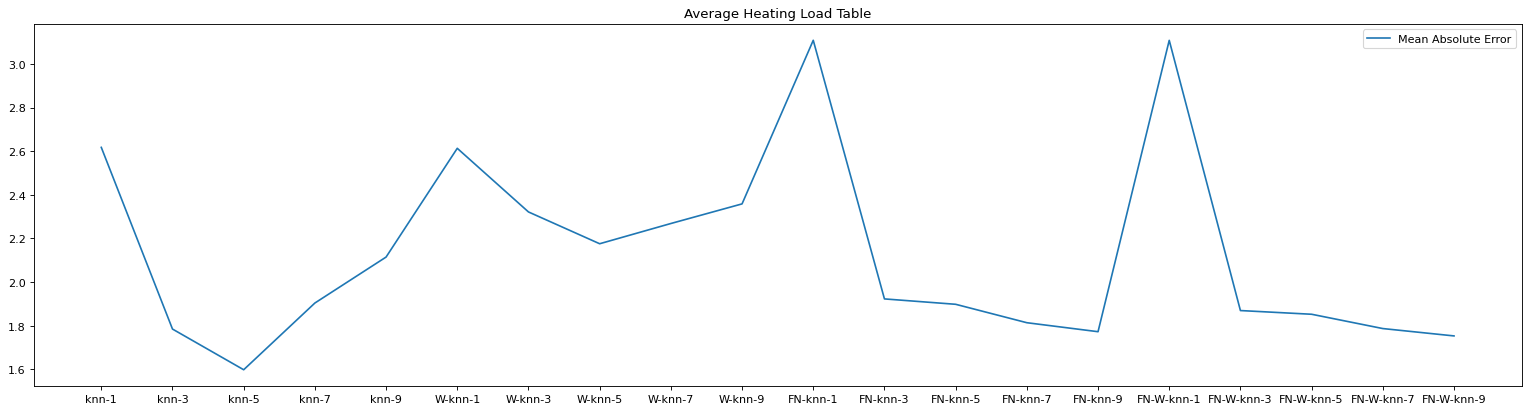

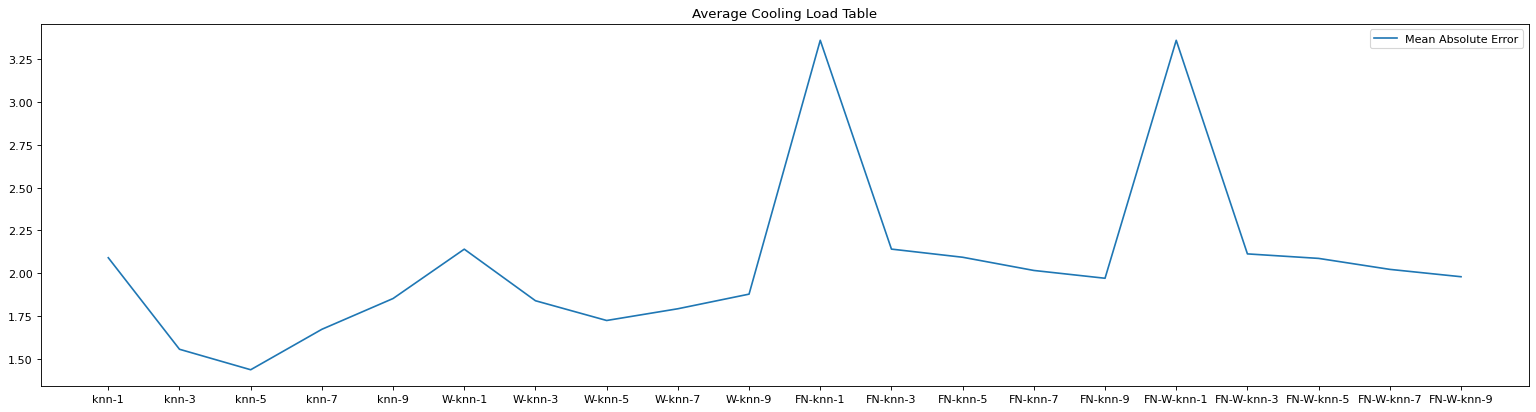

In [123]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(24, 6), dpi=80)

plt.title('Average Heating Load Table')
plt.plot(column, avgMAE1.loc['Average Heating Load'], label = 'Mean Absolute Error')
plt.legend()
plt.show()
print()
figure(figsize=(24, 6), dpi=80)
plt.title('Average Cooling Load Table')
plt.plot(column, avgMAE2.loc['Average Cooling Load'], label = 'Mean Absolute Error')
plt.legend()
plt.show()



**According to Regression Performance Metric, Heating Load prediction work with a Mean Absolute Error between 1.6 and 3.2 . Cooling Load prediction work with a Mean Absolute Error between 1.5 and 3.5 .**

Computation time complexity of the algorithm is:

***O(Fold size * test size * (train size * Log(train size)))***


>**The effect of k:** 
As the number k increases, the probability of error decreases. however, as the k number increases, overfitting may occur. The number k is the number of neighbors to be included in the calculation. The number of neighbors included in the calculation should be chosen optimally. The elbow points on the Mean Absolute Error graphs are the optimum k values. It seems clear that Mean Absolute Error is optimum for k=5.



> **The effect of the number of training samples used:** 
If the number of samples were increased, the measurement time would increase, but the mean absolute error would decrease. We use all data as train data using cross validation. 



> **The effect of using weighted k-NN:**
The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight to the points which are farther away. The simple function which is used is the inverse distance function.Thus, more accurate data were obtained. 


> **The effect of min-max normalization:**
If the scale of features is very different then normalization is required. This is because the distance calculation done in KNN uses feature values. When the one feature values are large than other, that feature will dominate the distance hence the outcome of the KNN. Because normalization helps reduce error rate by scaling the data when unrelated product data are collected in the same table.